In [1]:
!ls

bsd200 (1).tar	sample_data  yang91  yang91.zip


In [0]:
# Upload THE DATASET zip file
from google.colab import files
rc = list(files.upload().values())[0]


In [0]:
#UNZIP THE DATA SET
!unzip yang91.zip

In [0]:
!ls

In [46]:
# Upload THE TEST IMAGE FILE
from google.colab import files
rc = list(files.upload().values())[0]


Saving baby_GT.bmp to baby_GT (3).bmp


In [2]:
import keras.backend as K
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, Activation, Input
from keras import optimizers
from keras.models import load_model
import numpy as np
import scipy.misc
import scipy.ndimage
import cv2
import math
import glob
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [3]:
img_shape = (32,32,1)
input_img = Input(shape=(img_shape))
C1 = Conv2D(64,(9,9),padding='SAME',name='CONV1')(input_img)
A1 = Activation('relu', name='act1')(C1)
C2 = Conv2D(32,(1,1),padding='SAME',name='CONV2')(A1)
A2 = Activation('relu', name='act2')(C2)
C3 = Conv2D(1,(5,5),padding='SAME',name='CONV3')(A2)
A3 = Activation('relu', name='act3')(C3)
model = Model(input_img, A3)
opt = optimizers.Adam(lr=0.0003)
model.compile(optimizer=opt,loss='mean_squared_error')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 1)         0         
_________________________________________________________________
CONV1 (Conv2D)               (None, 32, 32, 64)        5248      
_________________________________________________________________
act1 (Activation)            (None, 32, 32, 64)        0         
_________________________________________________________________
CONV2 (Conv2D)               (None, 32, 32, 32)        2080      
_________________________________________________________________
act2 (Activation)            (None, 32, 32, 32)        0         
_________________________________________________________________
CONV3 (Conv2D)               (None, 32, 32, 1)         801       
_________________________________________________________________
act3 (Activation)            (None, 32, 32, 1)         0         
Total para

In [0]:
def modcrop(image, scale=2): #BY DEFAULT SCALE 2
   if len(image.shape) == 3:
      h, w, _ = image.shape
      h = h - np.mod(h, scale)
      w = w - np.mod(w, scale)
      image = image[0:h, 0:w, :]
   else:
      h, w = image.shape
      h = h - np.mod(h, scale)
      w = w - np.mod(w, scale)
      image = image[0:h, 0:w]
   return image

In [0]:
def create_LR(image,scale):
   label_ = modcrop(image, scale)
   # Must be normalized
   label_ = label_ / 255.
   input_ = scipy.ndimage.interpolation.zoom(label_, (1./scale), prefilter=False)
   input_ = scipy.ndimage.interpolation.zoom(input_, (scale/1.), prefilter=False)
   return input_

In [0]:
path = 'yang91/'
files_y = glob.glob(path + '*.bmp')
trainfiles = files_y[:85]             #HERE TOTAL IMAGES ARE 91 , SO FROM 91 up to 85 used for Training
valfiles = files_y[85:]               #HERE Above 85 used for Validation Set
img_size = 32
stride = 16
X_train = []
Y_train = []
X_val = []
Y_val = []

In [0]:
# Extract patch image for training
for file_y in trainfiles:
   tmp_y = scipy.misc.imread(file_y,flatten=True, mode='YCbCr').astype(np.float)
   tmp_X = create_LR(tmp_y,4)
   h,w = tmp_y.shape
   for x in range(0, h-img_size+1, stride):
      for y in range(0, w-img_size+1, stride):
         sub_input = tmp_X[x:x+img_size,            y:y+img_size].reshape(img_size,img_size,1)
         sub_label = tmp_y[x:x+img_size, y:y+img_size].reshape(img_size,img_size,1)
         X_train.append(sub_input)
         Y_train.append(sub_label)

In [0]:
# Extract patch image for validation
for file_y in valfiles:
   tmp_y = scipy.misc.imread(file_y,flatten=True, mode='YCbCr').astype(np.float)
   tmp_X = create_LR(tmp_y,4)
   h,w = tmp_y.shape
   for x in range(0, h-img_size+1, stride):
      for y in range(0, w-img_size+1, stride):
         sub_input = tmp_X[x:x+img_size,  y:y+img_size].reshape(img_size,img_size,1) # [32 x 32]
         sub_label = tmp_y[x:x+img_size, y:y+img_size].reshape(img_size,img_size,1) # [32 x 32]
         X_val.append(sub_input)
         Y_val.append(sub_label)

In [0]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_val = np.array(X_val)
Y_val = np.array(Y_val)

In [57]:
model.fit(X_train, Y_train, batch_size = 256, epochs = 30, validation_data=(X_val, Y_val))
model.save('wscale4.h5')

Train on 16083 samples, validate on 1119 samples
Epoch 1/30
16083/16083 [==============================] - 120s 7ms/step - loss: 278.4382 - val_loss: 205.2866
Epoch 2/30
16083/16083 [==============================] - 120s 7ms/step - loss: 278.2955 - val_loss: 205.1336
Epoch 3/30
16083/16083 [==============================] - 121s 8ms/step - loss: 278.1317 - val_loss: 204.7857
Epoch 4/30
16083/16083 [==============================] - 121s 7ms/step - loss: 278.0083 - val_loss: 204.5954
Epoch 5/30
16083/16083 [==============================] - 121s 8ms/step - loss: 277.9926 - val_loss: 204.9916
Epoch 6/30
16083/16083 [==============================] - 120s 7ms/step - loss: 277.8350 - val_loss: 204.5417
Epoch 7/30
16083/16083 [==============================] - 120s 7ms/step - loss: 277.7299 - val_loss: 204.2367
Epoch 8/30
16083/16083 [==============================] - 122s 8ms/step - loss: 277.6617 - val_loss: 203.9272
Epoch 9/30
16083/16083 [==============================] - 120s 7ms/step

In [58]:
img_o = scipy.misc.imread('baby_GT.bmp',flatten=True,mode='YCbCr').astype(np.float)
#img_o = scipy.misc.imread('yang91/t53.bmp',flatten=True,mode='YCbCr').astype(np.float)
img = create_LR(img_o,4)
img_size = 32
stride = 16
h,w = img.shape
piece_wise = []
for x in range(0, h-img_size+1, stride):
  for y in range (0, w-img_size+1, stride):
    sub_input = img[x:x+img_size, y:y+img_size].reshape(img_size,img_size,1)
    piece_wise.append(sub_input)
input_ = np.asarray(piece_wise)
srcnn = load_model('wscale4.h5')
hat = srcnn.predict(input_)
img_re = np.zeros(img.shape)
i = 0
for x in range(0, h-img_size+1, stride):
  for y in range (0, w-img_size+1, stride):
    img_re[x:x+img_size, y:y+img_size] = hat[i].reshape(img_size,img_size)
    i += 1
cv2.imwrite('restored1.bmp', img_re)
cv2.imwrite('HR1.bmp', img_o)
img_save = (img*255).astype(np.uint8)
cv2.imwrite('blurred1.bmp',img_save)


True

In [59]:
#CALCULATE PSNR
original = cv2.imread("HR1.bmp")
#original = cv2.imread("HR1.bmp")
contrast = cv2.imread("restored1.bmp",1)
def psnr(img1, img2):
  mse = np.mean((img1-img2)**2)
  if mse ==0:
        return 100
  PIXEL_MAX = 255.0
  return 20* math.log10(PIXEL_MAX / math.sqrt(mse))
d = psnr(original,contrast)
print(d)


32.99797077025906


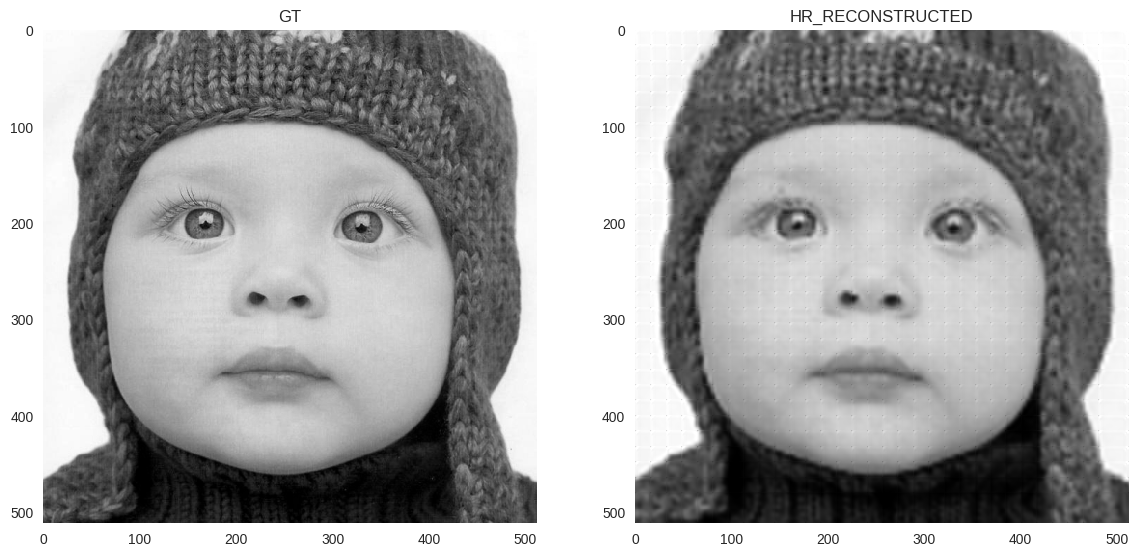

In [60]:
fig = plt.figure(figsize = (14,14), dpi = 100)
ax = plt.subplot("121")
ax.imshow(original)
ax.set_title("GT")
plt.grid(0)


ax = plt.subplot("122")
ax.imshow(contrast)
ax.set_title("HR_RECONSTRUCTED")
plt.grid(0)
plt.show()
